In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =pd.read_csv('../data/raw/autorenew.csv')
df.sample(5)

,dateCrawled,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
350694,2016-04-02 05:03:58,Audi__Q3_S_line,private,offer,27499,suv,2013,manually,175.0,q3,40000,9,diesel,audi,no,2016-04-02,0,85049,2016-04-06 06:44:40
258524,2016-03-21 17:56:15,Mondeo_Turnier_2.2_TDCi_Titanium_S_Navi_Bi_Xenon,private,offer,7000,combi,2011,manually,197.0,mondeo,50000,3,diesel,ford,no,2016-03-21,0,10115,2016-03-21 17:56:15
107482,2016-03-29 16:52:35,Mercedes_Benz_C_200_T_Elegance,private,offer,600,combi,1997,automatic,134.0,c_klasse,150000,4,petrol,mercedes_benz,no,2016-03-29,0,9114,2016-04-04 01:44:36
74701,2016-04-03 22:57:00,Toyota_Land_Cruiser_V6_GX_class_Full_Option_4x4,private,offer,35000,suv,2010,automatic,0.0,andere,100000,6,petrol,toyota,NaN,2016-04-03,0,4158,2016-04-06 00:16:10
359481,2016-04-03 14:50:22,Mazda_2_1.4_CD_Active,private,offer,1490,small car,2004,manually,67.0,andere,150000,10,diesel,mazda,no,2016-04-03,0,63755,2016-04-05 13:47:43


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          371528 non-null  object 
 1   name                 371528 non-null  object 
 2   seller               371528 non-null  object 
 3   offerType            371528 non-null  object 
 4   price                371528 non-null  int64  
 5   vehicleType          237765 non-null  object 
 6   yearOfRegistration   371528 non-null  int64  
 7   gearbox              351319 non-null  object 
 8   powerCV              371528 non-null  float64
 9   model                351044 non-null  object 
 10  kilometer            371528 non-null  int64  
 11  monthOfRegistration  371528 non-null  int64  
 12  fuelType             338142 non-null  object 
 13  brand                371528 non-null  object 
 14  notRepairedDamage    299468 non-null  object 
 15  dateCreated      

## parsear fechas al read a `datetime`

In [5]:
df = pd.read_csv('../data/raw/autorenew.csv',parse_dates=['dateCrawled','dateCreated','lastSeen'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   vehicleType          237765 non-null  object        
 6   yearOfRegistration   371528 non-null  int64         
 7   gearbox              351319 non-null  object        
 8   powerCV              371528 non-null  float64       
 9   model                351044 non-null  object        
 10  kilometer            371528 non-null  int64         
 11  monthOfRegistration  371528 non-null  int64         
 12  fuelType             338142 non-null  object        
 13  brand         

### analisis de fechas (que años tratamos)


In [6]:
columnasfechas = ['dateCrawled','dateCreated','lastSeen']
for col in columnasfechas:
    print(f'Columna tratada: {col} ---> tiene estos valores unicos por año: {df[col].dt.year.unique()}')

Columna tratada: dateCrawled ---> tiene estos valores unicos por año: [2016]
Columna tratada: dateCreated ---> tiene estos valores unicos por año: [2016 2015 2014]
Columna tratada: lastSeen ---> tiene estos valores unicos por año: [2016]


## eliminamos las columnas de fechas porque no nos aportan nada

In [7]:
df = df.drop(columns=columnasfechas)

## duplicados

In [8]:
df.duplicated().sum()

np.int64(6624)

## elimimaos duplicados

In [9]:
df = df.drop_duplicates()

## valores nulos total

In [10]:
round(df.isnull().mean()*100,2).sort_values(ascending=False)    

vehicleType            36.03
notRepairedDamage      19.40
fuelType                9.07
model                   5.56
gearbox                 5.43
name                    0.00
seller                  0.00
offerType               0.00
price                   0.00
yearOfRegistration      0.00
powerCV                 0.00
kilometer               0.00
monthOfRegistration     0.00
brand                   0.00
nrOfPictures            0.00
postalCode              0.00
dtype: float64

## almacenar los nuelos en una variable para aplicar filtros

In [11]:
nulos = df.isnull().mean()*100
nulos[nulos > 0].sort_values(ascending=False).round(2)

vehicleType          36.03
notRepairedDamage    19.40
fuelType              9.07
model                 5.56
gearbox               5.43
dtype: float64

## variables numericas

In [12]:
columnas_numericas = df.select_dtypes(include='number').columns
columnas_numericas

Index(['price', 'yearOfRegistration', 'powerCV', 'kilometer',
       'monthOfRegistration', 'nrOfPictures', 'postalCode'],
      dtype='object')

In [13]:
df.describe(include='number').T.round(2)

,count,mean,std,min,25%,50%,75%,max
price,364904.0,17502.27,3620372.48,0.0,1150.0,2950.0,7150.0,2.147484e+09
yearOfRegistration,364904.0,2004.58,93.55,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerCV,364904.0,113.93,190.97,0.0,69.0,104.0,148.0,1.972600e+04
kilometer,364904.0,125685.07,40090.32,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration,364904.0,5.73,3.71,0.0,3.0,6.0,9.0,1.200000e+01
nrOfPictures,364904.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000000e+00
postalCode,364904.0,50944.55,25775.64,1067.0,30655.0,49688.0,71642.0,9.999800e+04


## elimamos numero de imagenes

In [14]:
df = df.drop(columns='nrOfPictures')

In [15]:
df = df.drop(columns='postalCode')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364904 entries, 0 to 371527
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 364904 non-null  object 
 1   seller               364904 non-null  object 
 2   offerType            364904 non-null  object 
 3   price                364904 non-null  int64  
 4   vehicleType          233442 non-null  object 
 5   yearOfRegistration   364904 non-null  int64  
 6   gearbox              345098 non-null  object 
 7   powerCV              364904 non-null  float64
 8   model                344610 non-null  object 
 9   kilometer            364904 non-null  int64  
 10  monthOfRegistration  364904 non-null  int64  
 11  fuelType             331820 non-null  object 
 12  brand                364904 non-null  object 
 13  notRepairedDamage    294128 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 41.8+ MB


## histogramas

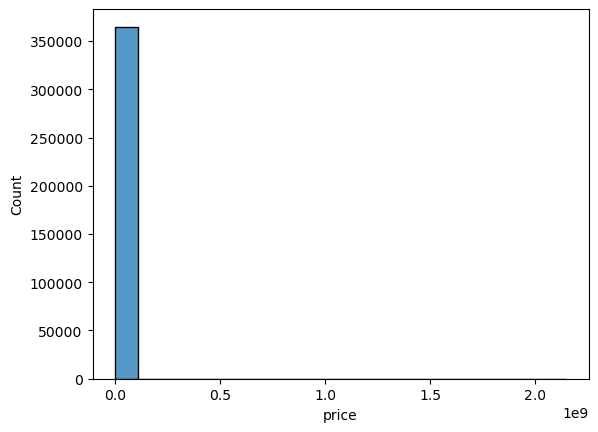

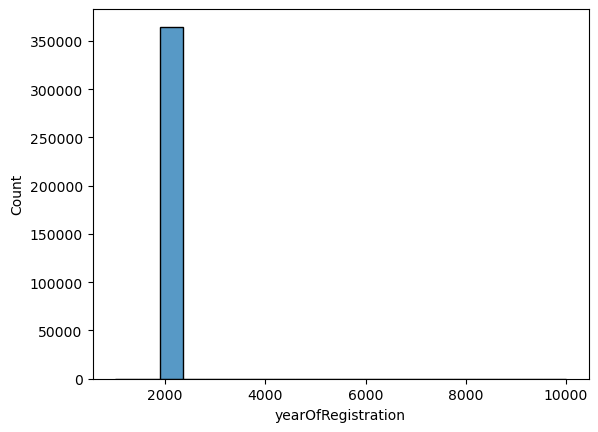

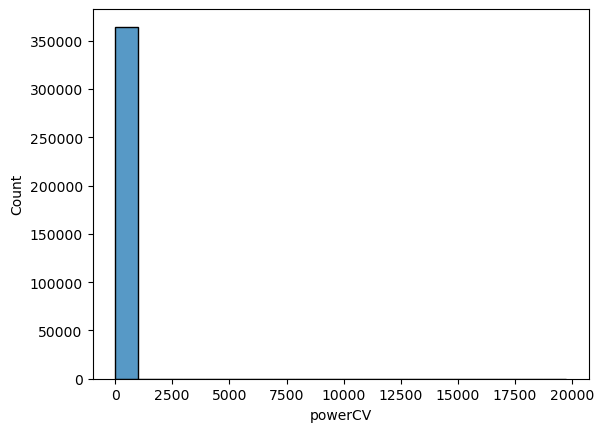

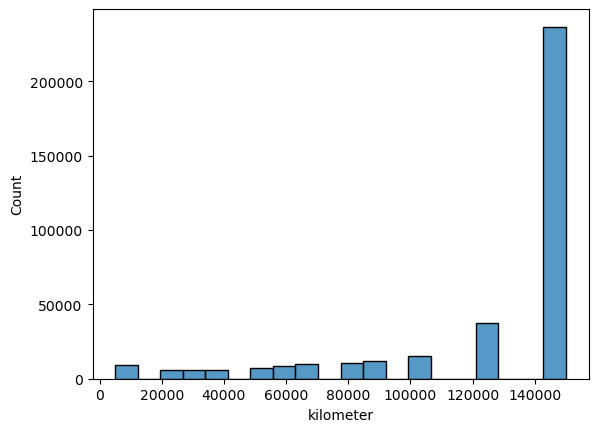

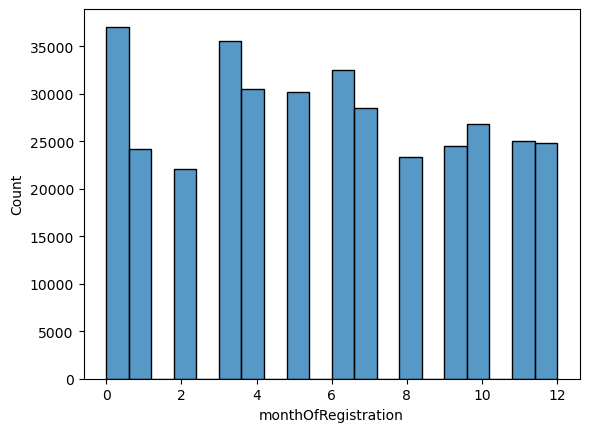

KeyError: 'nrOfPictures'

<Figure size 640x480 with 0 Axes>

In [17]:
columnas_numericas = columnas_numericas.drop(['postalCode'])
for col in columnas_numericas:
    plt.figure()
    sns.histplot(df[col],bins=20)
    plt.show()


## boxplot

In [28]:
columnas_numericas 

Index(['price', 'yearOfRegistration', 'powerCV', 'kilometer',
       'monthOfRegistration'],
      dtype='object')

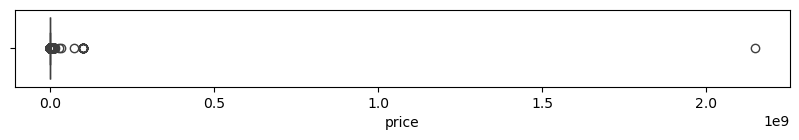

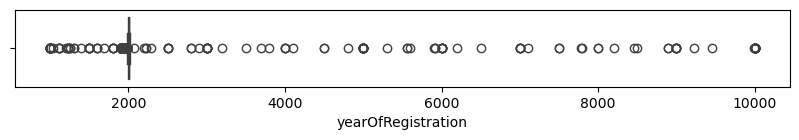

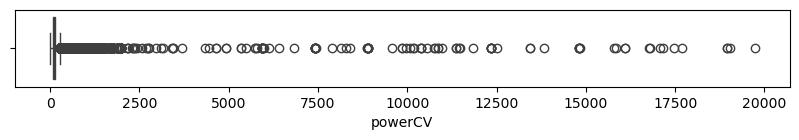

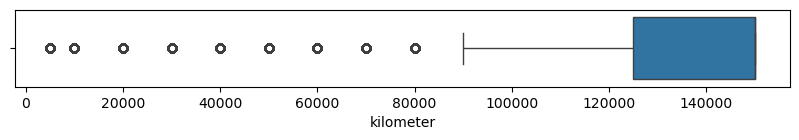

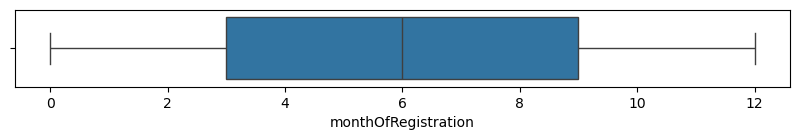

In [31]:
for col in columnas_numericas:
    plt.figure(figsize=(10,1))
    sns.boxplot(x=df[col])
    plt.show()